# Analysis of Student Data for Union College Math Majors

## Part 5b - Display map data

* Display student hometowns on interactive map (when running in Jupyter Notebook or nbviewer).
* Show sample maps for viewing on GitHub

### Set up the notebook environment

In [1]:
# Imports
import folium
from IPython.display import Image
import pandas as pd

### Map Student Hometowns

In [2]:
# Load hometown and student info data
hometowns = pd.read_csv('data/map_data.csv')
info = pd.read_excel('data/union_students_818_cleaned.xlsx', sheet_name='info')

info = info.merge(hometowns, on='id')

# Add color by class_year to student info
color_list = ['purple', 'purple', 'blue', 'lightblue', 'green', 'beige', 
              'orange', 'lightred']
class_list = [2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
colors = pd.DataFrame({'map_color': color_list}, index=class_list)
colors.index.rename('class_year', inplace=True)
display(colors)

info = info.join(colors, on='class_year')

,map_color
class_year,
2010,purple
2013,purple
2014,blue
2015,lightblue
2016,green
2017,beige
2018,orange
2019,lightred


In [3]:
# Draw map with markers
union_lat_lng = (42.8173, -73.930)

# Iniate map 
#  # North-East USA map, centered on Union
#student_map = folium.Map(location=[(union_lat_lng[0]), (union_lat_lng[1])],
#                         zoom_start=7)
#  # World map
student_map = folium.Map(location=[27, 0], zoom_start=2)

# Add Union College marker
union_marker = (folium
 .Marker([union_lat_lng[0], union_lat_lng[1]],
         popup='Union College',
         icon=folium.Icon(icon_color='white', color='darkred',
                          icon='university', prefix='fa')
        ))
union_marker.add_to(student_map)
student_map.keep_in_front(union_marker) # Not functioning???

# Add hometown markers
(info
 #.iloc[:10] # for troubleshooting
 .fillna('')
 .apply(lambda row: folium
        .Marker([row.lat, row.lng], 
                popup=('''<p>Student ID: {0}<br>'''
                       '''Hometown: {1}, {2}</p>'''
                       .format(row['id'], row['home_city'], row['home_state'])),
                icon=folium.Icon(icon_color='white', color=row['map_color'],
                                 icon='graduation-cap', prefix='fa'),
               )
        .add_to(student_map), axis='columns')
)

print('Student Hometowns:')
student_map

Student Hometowns:


In [4]:
# Save sample map as .png
import os
import time
from selenium import webdriver

map_name = 'student_map_world'
map_html = '{0}.html'.format(map_name)

delay=5
tmpurl='file://{path}/images/{mapfile}'.format(path=os.getcwd(), 
                                               mapfile=map_html) 
student_map.save('images/{0}'.format(map_html))

browser = webdriver.Firefox()
browser.set_window_size(1000, 700)
browser.get(tmpurl)
time.sleep(delay)      #Give map time to load
browser.save_screenshot('images/{0}.png'.format(map_name))
browser.quit()

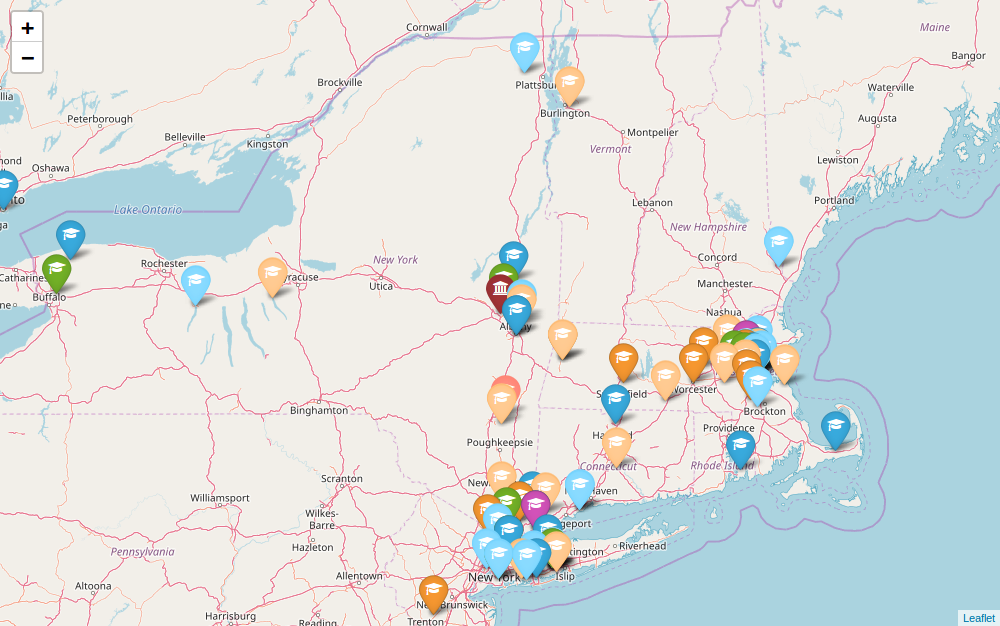

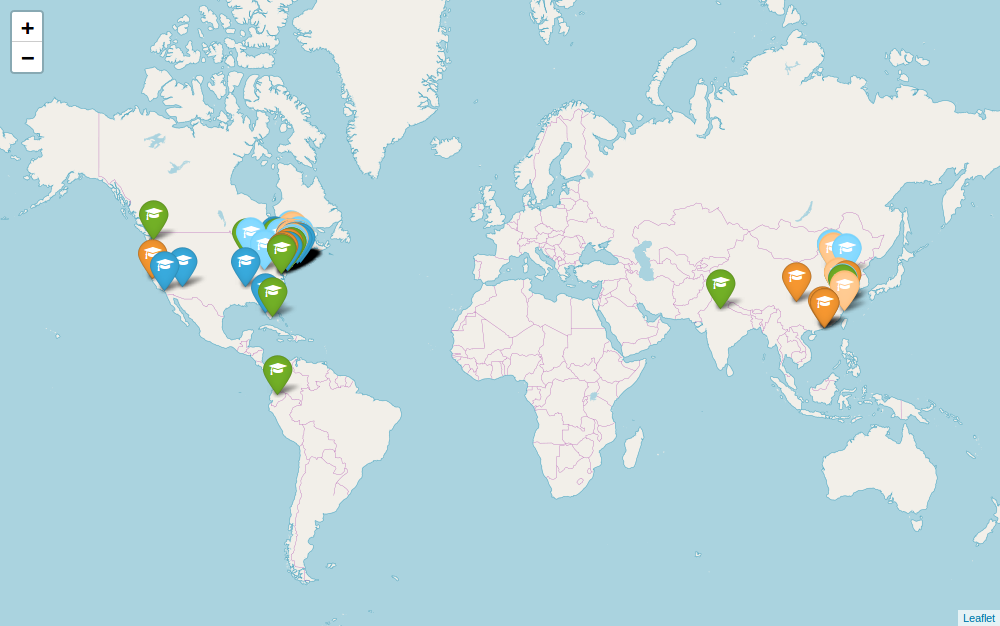

In [5]:
# Display sample maps
display(Image('images/student_map_northeast.png'))
display(Image('images/student_map_world.png'))